In [13]:
import jax.numpy as jnp
from jax import jit 
from jax.flatten_util import ravel_pytree

import numpy as np
import scipy
import matplotlib.pyplot as plt
import interpax

from scipy.signal import find_peaks
from adoptODE import train_adoptODE, simple_simulation, dataset_adoptODE
from HelperAndMechanics import *
import progressbar
import argparse
import subprocess

### Loss dependence on time shift


In [14]:
dt = np.linspace(-1,1,100)

# for i in range(100):
#     result = subprocess.run(['python3', 'PeakShiftMain.py', str(i),str(dt[i])], capture_output=True, text=True)
#     print(i)    

Text(0.5, 1.0, 'dependence of loss on time shift of acitve stress')

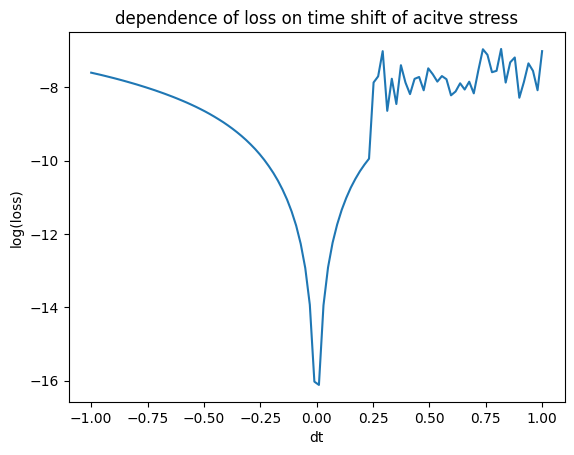

In [15]:
dt_error = np.load('../data/SpringMassModel/dtError/dt_error1.npy')
dt_error
plt.plot(dt, np.log(dt_error))   
plt.xlabel('dt')
plt.ylabel('log(loss)')
plt.title('dependence of loss on time shift of acitve stress')
#plt.savefig('../data/SpringMassModel/dt_error1.png')

In [75]:
# eta_arr = np.full((10,10,5,2), np.nan)
# np.save('../data/SpringMassModel/EtaSweep/eta_sweep3.npy', eta_arr)
eta_arr = np.load('../data/SpringMassModel/EtaSweep/eta_sweep7.npy')[:,:,:,0]
eta_arr[np.isnan(eta_arr)] = 0
loss = np.load('../data/SpringMassModel/EtaSweep/eta_sweep7.npy')[:,:,:,1]
loss[np.isnan(loss)] = 1
eta_real = 1 - np.load('../data/SpringMassModel/FiberOrientation/fiber_orientation.npy')

eta_best = np.full((10,10), np.nan)
rel_err = np.full((10,10), np.nan)

index = np.abs(loss).argmin(axis=2)
for i in range(10):
    for j in range(10):
        eta_best[i,j] = eta_arr[i,j,index[i,j]]
        rel_err[i,j] = np.abs(eta_best[i,j] - eta_real[5 + i * 10, 5 + j * 10])




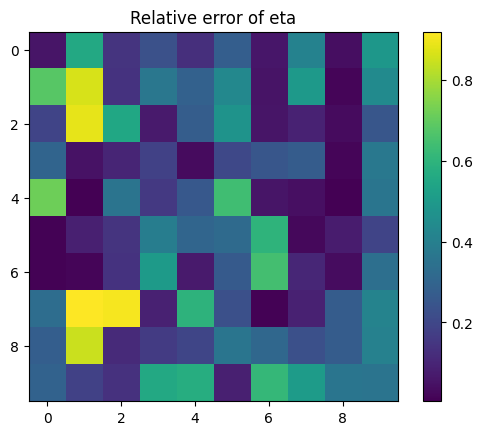

In [76]:
import matplotlib.pyplot as plt

plt.imshow(rel_err, cmap='viridis', interpolation='nearest')
plt.title('Relative error of eta')
plt.colorbar()
#plt.savefig('eta_sweep_withpeakfinder_eta05.png')

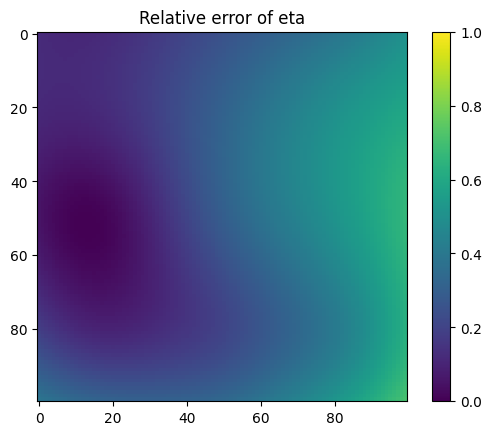

In [79]:

plt.imshow(eta_real, cmap='viridis',vmin=0, vmax=1, interpolation='nearest')
plt.title('Relative error of eta')
plt.colorbar()

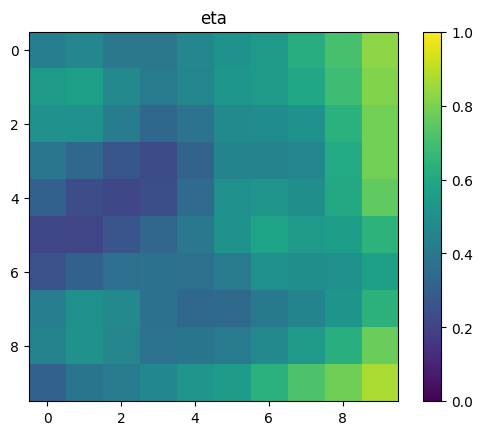

In [77]:
#apply gaussian smoothing to eta_best
from scipy.ndimage import gaussian_filter
eta_best_smooth = gaussian_filter(eta_best, sigma=1)
plt.imshow(eta_best_smooth,vmin=0, vmax=1, cmap='viridis', interpolation='nearest')
plt.title('eta')
#plot colorbar with range fixed from 0 to 1
plt.colorbar()



In [68]:
#load data from h5 file
import h5py
import numpy as np

data = h5py.File('../data/SpringMassModel/FiberOrientation/fiber_raw.h5', 'r')

In [69]:
fiber_orientation = data['fiber_orientation_angle']
fiber_orientation.shape

(140, 140)

In [70]:
fiber_orientation = data['fiber_orientation_angle']

# Step 1: Find the minimum and maximum values
min_val = np.min(fiber_orientation)
max_val = np.max(fiber_orientation)

# Step 2: Normalize the values to a range between 0 and 1
normalized_fiber_orientation = (fiber_orientation - min_val) / (max_val - min_val)
#restrict to inner 100*100 values
normalized_fiber_orientation = normalized_fiber_orientation[20:120,20:120]
# save to npy file
#np.save('../data/SpringMassModel/FiberOrientation/fiber_orientation.npy', normalized_fiber_orientation)

# # Save 2D array to file
# with open("fiber_orientation.txt", "w") as file:
#     for row in normalized_fiber_orientation:
#         file.write(" ".join(map(str, row)) + "\n")  # Write each 

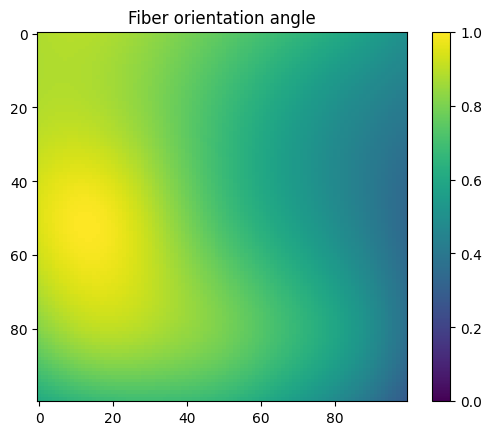

In [71]:
#plot heatmapt of fiber orientation

plt.imshow(normalized_fiber_orientation,vmin=0, vmax=1,  cmap='viridis', interpolation='nearest')
plt.title('Fiber orientation angle')
plt.colorbar()
